In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
# unnamed:0 can be dropped since it is of no use
# rename the columns x,y and z for the clarity sake
df.info()  # getting the information of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


##### although there are missing values in the  feature =" depth"  the datatype looks ok.

In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
# % age of null values to the total values
percentage_null_items =100*(697/26967)
print ("Percentage of null values in the dataset: ",percentage_null_items)

Percentage of null values in the dataset:  2.5846404865205623


In [9]:
df.depth.value_counts()

62.0    1131
61.9    1091
62.1    1016
61.8    1012
62.2     977
        ... 
69.2       1
55.0       1
54.6       1
54.2       1
68.6       1
Name: depth, Length: 169, dtype: int64

In [10]:
def univariateanalysis (column,bins):
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    print (df[column].describe(), end='')
       
    plt.figure()
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    sns.distplot(df[column],kde= True, color = 'r');
    plt.show()
    
    plt.figure()
    print ('Boxplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.boxplot(x= df[column])
    plt.show()

In [11]:
def analysisforcat (column,bins):
    print ('Unique Values of'+ column)
    print ('-------------------------------------------------------------------------------------')
    print ('Total no. of unique values: ', (df[column].nunique()))
    print (df[column].value_counts(normalize= True, sort= False, ascending=True),end='')
    
    plt.figure()
    print ('Countplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.countplot(x=df[column]);
    plt.show()
    

In [12]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [13]:
df=df.rename(columns={'x':'length_x'})
df=df.rename(columns={'y':'width_y'})
df=df.rename(columns={'z':'height_z'})

In [14]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [15]:
df= df.drop(['Unnamed: 0'],axis=1)

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
length_x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
width_y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
height_z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [18]:
numcol= df[['carat','depth','table','length_x','width_y','height_z','price']]
numcol

,carat,depth,table,length_x,width_y,height_z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


Description of carat
--------------------------------------------------------------------------------------
count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64Description of carat
--------------------------------------------------------------------------------------


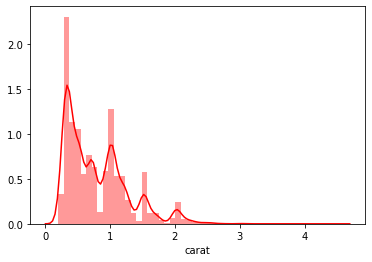

Boxplot of carat
--------------------------------------------------------------------------------------


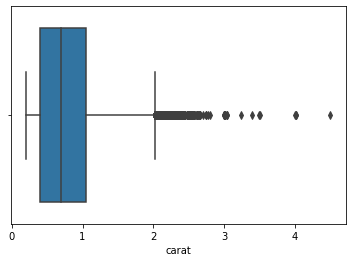

Description of depth
--------------------------------------------------------------------------------------
count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64Description of depth
--------------------------------------------------------------------------------------


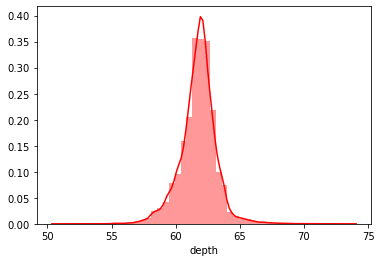

Boxplot of depth
--------------------------------------------------------------------------------------


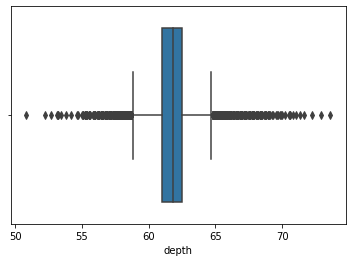

Description of table
--------------------------------------------------------------------------------------
count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64Description of table
--------------------------------------------------------------------------------------


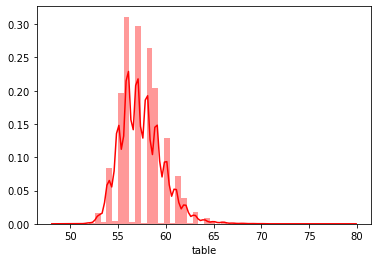

Boxplot of table
--------------------------------------------------------------------------------------


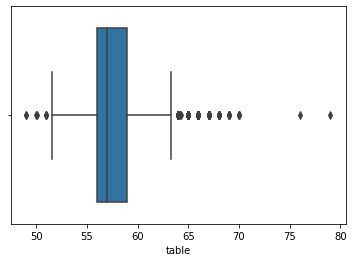

Description of length_x
--------------------------------------------------------------------------------------
count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: length_x, dtype: float64Description of length_x
--------------------------------------------------------------------------------------


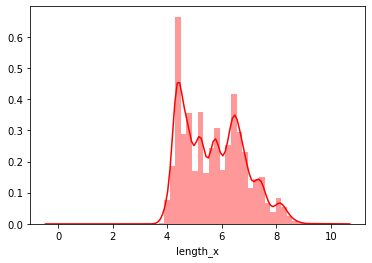

Boxplot of length_x
--------------------------------------------------------------------------------------


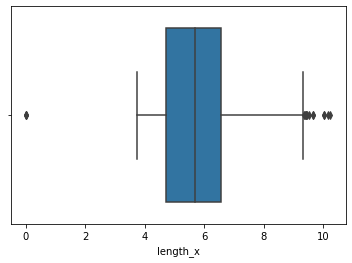

Description of width_y
--------------------------------------------------------------------------------------
count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: width_y, dtype: float64Description of width_y
--------------------------------------------------------------------------------------


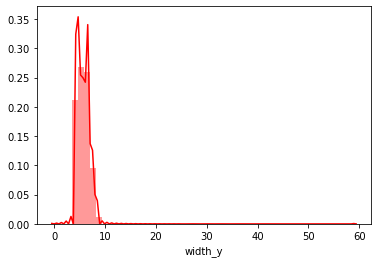

Boxplot of width_y
--------------------------------------------------------------------------------------


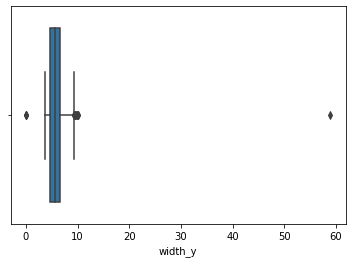

Description of height_z
--------------------------------------------------------------------------------------
count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: height_z, dtype: float64Description of height_z
--------------------------------------------------------------------------------------


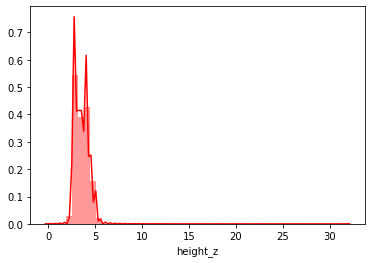

Boxplot of height_z
--------------------------------------------------------------------------------------


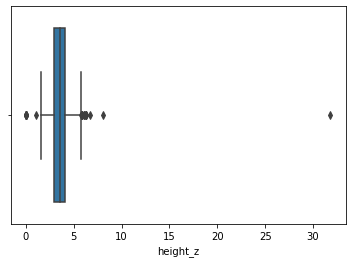

Description of price
--------------------------------------------------------------------------------------
count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64Description of price
--------------------------------------------------------------------------------------


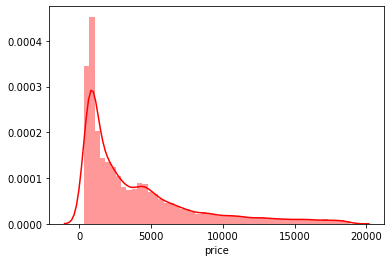

Boxplot of price
--------------------------------------------------------------------------------------


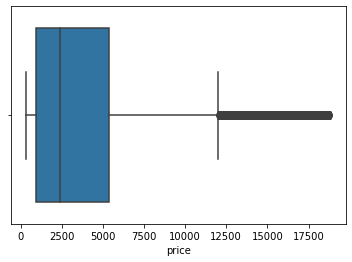

In [19]:
for x in numcol:
    univariateanalysis(x,20)

In [20]:
catcol= df[['cut','color','clarity']]
catcol

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


Unique Values ofcut
-------------------------------------------------------------------------------------
Total no. of unique values:  5
Good         0.090518
Ideal        0.401083
Fair         0.028961
Premium      0.255831
Very Good    0.223607
Name: cut, dtype: float64Countplot of cut
--------------------------------------------------------------------------------------


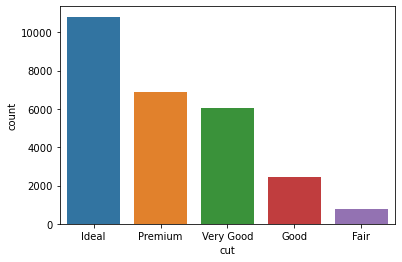

Unique Values ofcolor
-------------------------------------------------------------------------------------
Total no. of unique values:  7
H    0.152112
G    0.209923
I    0.102755
D    0.124003
F    0.175362
J    0.053510
E    0.182334
Name: color, dtype: float64Countplot of color
--------------------------------------------------------------------------------------


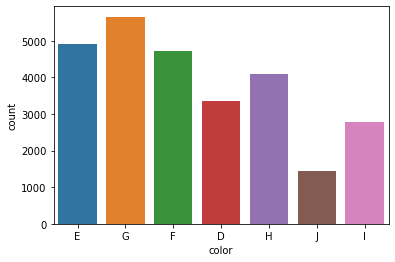

Unique Values ofclarity
-------------------------------------------------------------------------------------
Total no. of unique values:  8
SI1     0.243668
SI2     0.169652
I1      0.013535
VVS2    0.093855
VS1     0.151778
VS2     0.226165
VVS1    0.068194
IF      0.033152
Name: clarity, dtype: float64Countplot of clarity
--------------------------------------------------------------------------------------


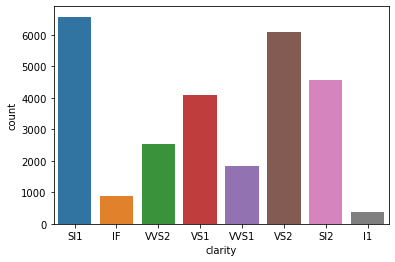

In [21]:
for i in catcol:
    analysisforcat(i,20)
    

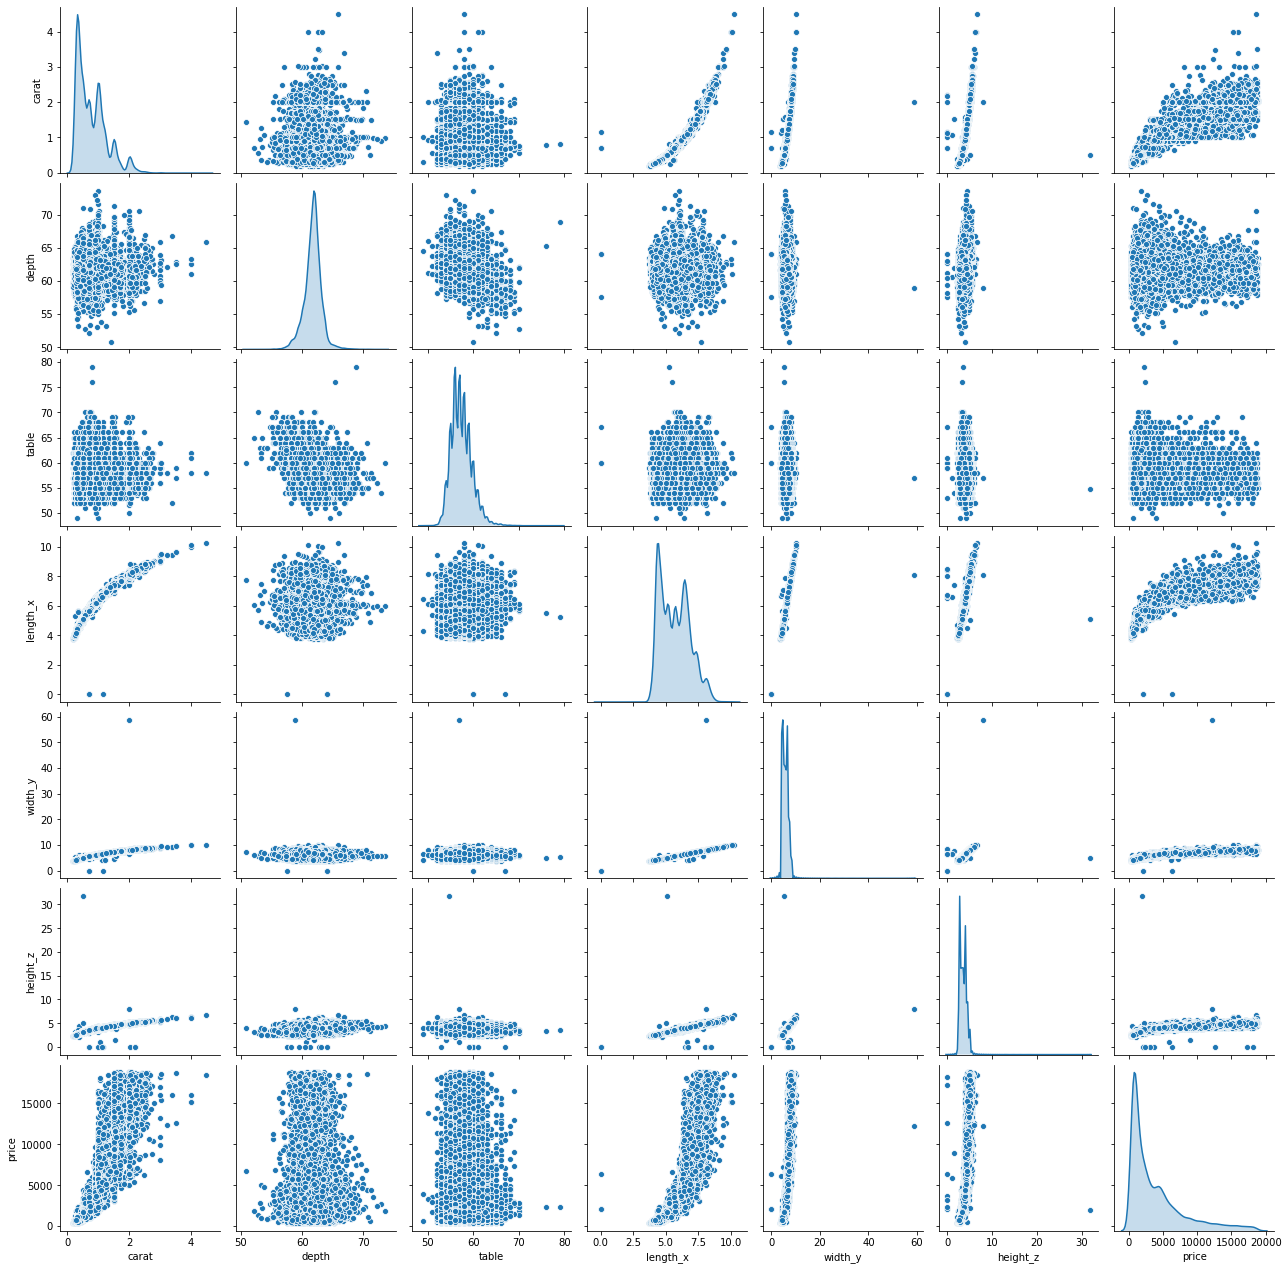

In [22]:
sns.pairplot(df, diag_kind='kde')
plt.show()

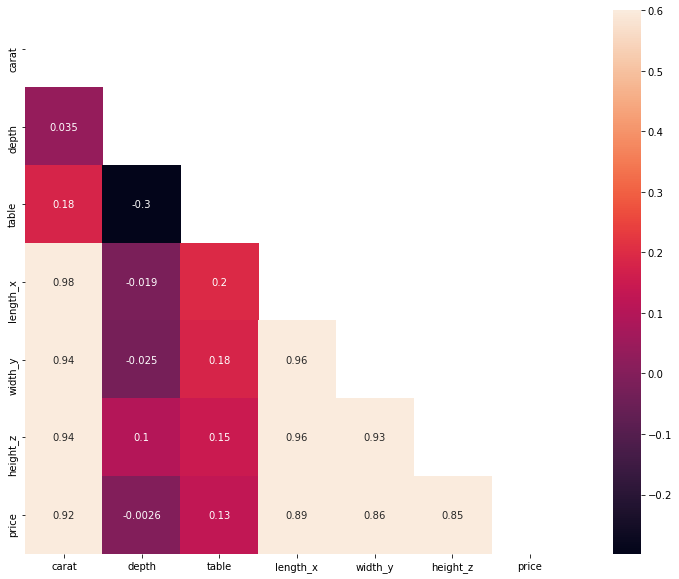

In [23]:
plt.figure(figsize=(16,10))
corr=df.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr,mask=mask, vmax=.6, square=True,annot=True)
plt.show()

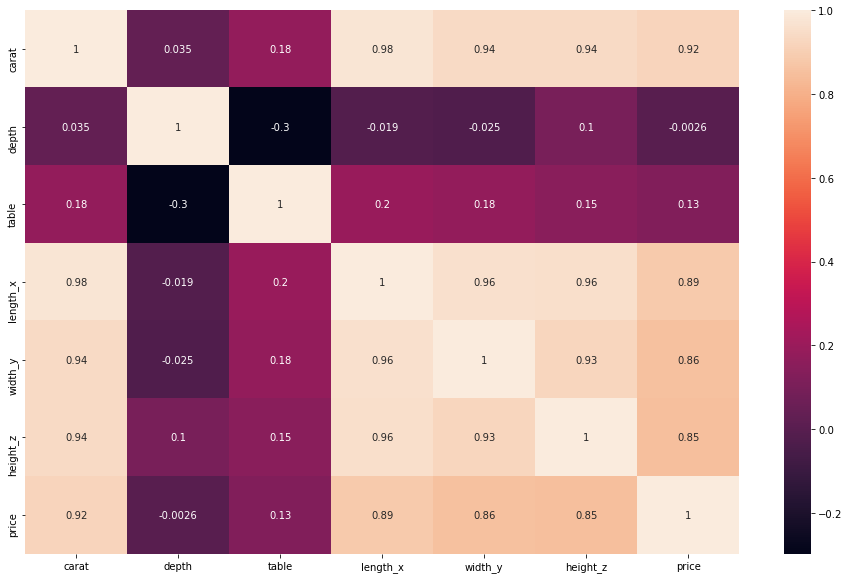

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()


In [25]:
df= df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26270 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carat     26270 non-null  float64
 1   cut       26270 non-null  object 
 2   color     26270 non-null  object 
 3   clarity   26270 non-null  object 
 4   depth     26270 non-null  float64
 5   table     26270 non-null  float64
 6   length_x  26270 non-null  float64
 7   width_y   26270 non-null  float64
 8   height_z  26270 non-null  float64
 9   price     26270 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [27]:
df.shape

(26270, 10)

In [28]:
# imputing median inplace of 0 values in length, width and height

df['length_x']=np.where(df['length_x']==0,df['length_x'].median(),df['length_x'])
df['width_y']=np.where(df['width_y']==0,df['width_y'].median(),df['width_y'])
df['height_z']=np.where(df['height_z']==0,df['height_z'].median(),df['height_z'])

In [29]:
df[['length_x','width_y','height_z']].describe()

,length_x,width_y,height_z
count,26270.000000,26270.000000,26270.000000
mean,5.729817,5.733618,3.537842
std,1.125851,1.164720,0.696263
min,3.730000,3.710000,1.070000
25%,4.710000,4.720000,2.900000
50%,5.690000,5.700000,3.520000
75%,6.550000,6.540000,4.040000
max,10.230000,58.900000,8.060000


Description of carat
--------------------------------------------------------------------------------------
count    26270.000000
mean         0.797995
std          0.477214
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64Description of carat
--------------------------------------------------------------------------------------


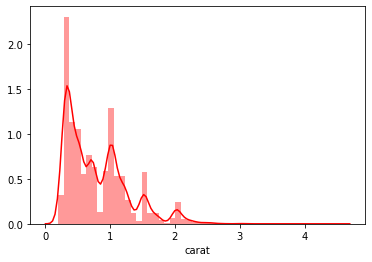

Boxplot of carat
--------------------------------------------------------------------------------------


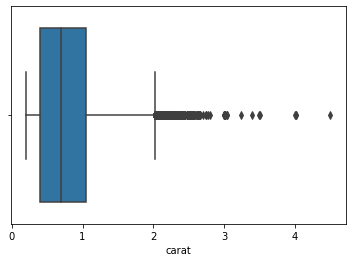

Description of depth
--------------------------------------------------------------------------------------
count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64Description of depth
--------------------------------------------------------------------------------------


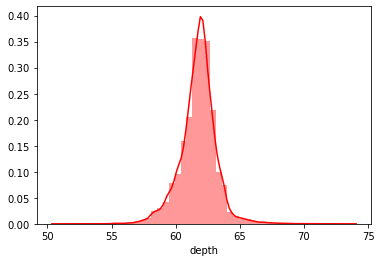

Boxplot of depth
--------------------------------------------------------------------------------------


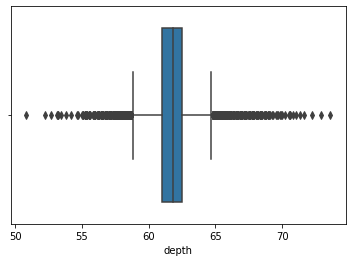

Description of table
--------------------------------------------------------------------------------------
count    26270.000000
mean        57.456011
std          2.230776
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64Description of table
--------------------------------------------------------------------------------------


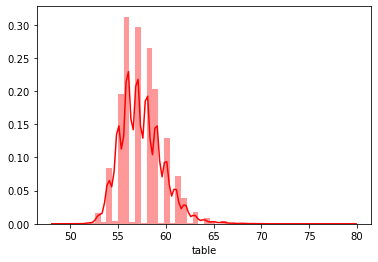

Boxplot of table
--------------------------------------------------------------------------------------


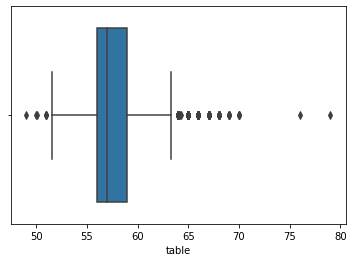

Description of length_x
--------------------------------------------------------------------------------------
count    26270.000000
mean         5.729817
std          1.125851
min          3.730000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: length_x, dtype: float64Description of length_x
--------------------------------------------------------------------------------------


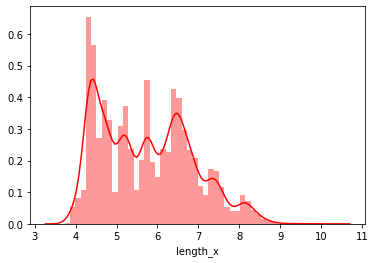

Boxplot of length_x
--------------------------------------------------------------------------------------


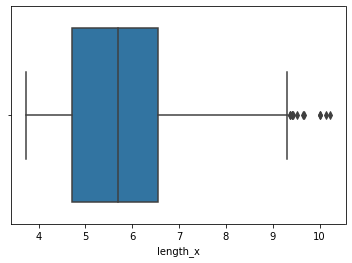

Description of width_y
--------------------------------------------------------------------------------------
count    26270.000000
mean         5.733618
std          1.164720
min          3.710000
25%          4.720000
50%          5.700000
75%          6.540000
max         58.900000
Name: width_y, dtype: float64Description of width_y
--------------------------------------------------------------------------------------


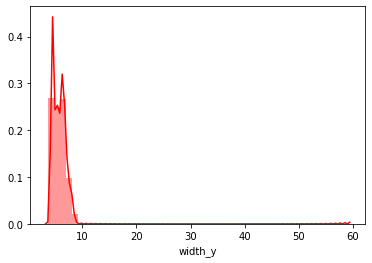

Boxplot of width_y
--------------------------------------------------------------------------------------


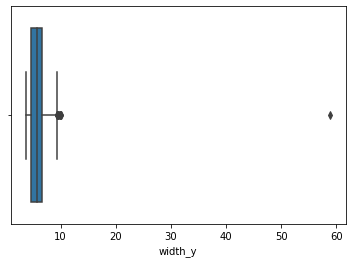

Description of height_z
--------------------------------------------------------------------------------------
count    26270.000000
mean         3.537842
std          0.696263
min          1.070000
25%          2.900000
50%          3.520000
75%          4.040000
max          8.060000
Name: height_z, dtype: float64Description of height_z
--------------------------------------------------------------------------------------


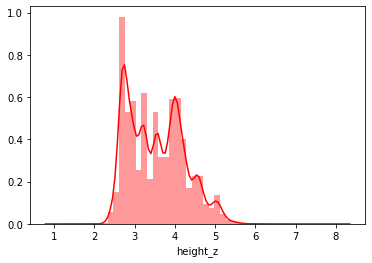

Boxplot of height_z
--------------------------------------------------------------------------------------


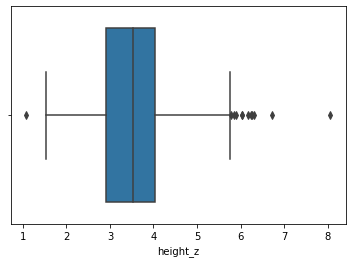

Description of price
--------------------------------------------------------------------------------------
count    26270.000000
mean      3937.973734
std       4022.189341
min        326.000000
25%        945.000000
50%       2375.000000
75%       5361.000000
max      18818.000000
Name: price, dtype: float64Description of price
--------------------------------------------------------------------------------------


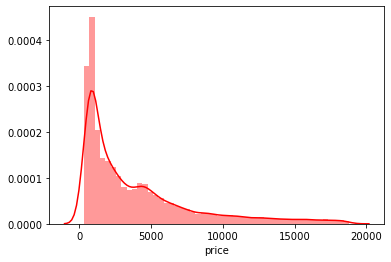

Boxplot of price
--------------------------------------------------------------------------------------


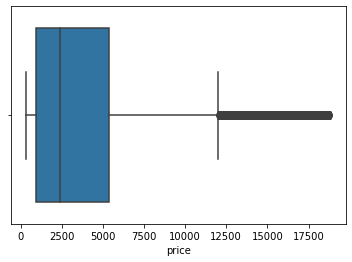

In [30]:
for x in numcol:
    univariateanalysis(x,20)

In [31]:
def uniqueforcat (column,bins):
    print ('Total no. of unique values: '+column, (df[column].nunique()))
    print('-----------------------')
    print (df[column].unique())
    print(' ')
    
    

In [32]:
for i in catcol:
    uniqueforcat(i,20)

Total no. of unique values: cut 5
-----------------------
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
 
Total no. of unique values: color 7
-----------------------
['E' 'G' 'F' 'D' 'H' 'J' 'I']
 
Total no. of unique values: clarity 8
-----------------------
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
 


In [33]:
df.head()

,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [34]:
Cut_ord= ['Ideal','Premium','Very Good','Good','Fair']
Color_ord= ['D','E','F','G','H','I','J' ]
Clarity_ord= ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [36]:
enc=OrdinalEncoder(categories=[Cut_ord])

In [37]:
enc.fit_transform(df[['cut']])

array([[0.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]])

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [39]:
df[['cut']]= enc.fit_transform(df[['cut']])

In [40]:
df.head()

,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,0.30,0.0,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1.0,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0.0,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0.0,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [41]:
enc=OrdinalEncoder(categories=[Color_ord])

In [42]:
df[['color']]= enc.fit_transform(df[['color']])

In [43]:
df.head()

,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,0.30,0.0,1.0,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1.0,3.0,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,1.0,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0.0,2.0,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0.0,2.0,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [44]:
enc=OrdinalEncoder(categories=[Clarity_ord])


In [45]:
df[['clarity']]= enc.fit_transform(df[['clarity']])

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,0.30,0.0,1.0,5.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1.0,3.0,0.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,1.0,2.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0.0,2.0,3.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0.0,2.0,1.0,60.4,59.0,4.35,4.43,2.65,779


In [47]:
# Train test Split

x= df.drop('price', axis= 1)

y= df[['price']]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,train_labels,test_labels =train_test_split(x,y, test_size =0.30, random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regression_model= LinearRegression()
regression_model.fit(x_train,train_labels)

LinearRegression()

In [51]:
for i, col_name in enumerate(x_train.columns):
    print ("Coefficient of {} is {}".format(col_name,regression_model.coef_[0][i] ))

Coefficient of carat is 11209.07829432937
Coefficient of cut is -124.10482887442933
Coefficient of color is -333.9383337979946
Coefficient of clarity is -495.60187872867266
Coefficient of depth is 23.587973211616934
Coefficient of table is -24.26604073894104
Coefficient of length_x is -1800.7917856067725
Coefficient of width_y is 1871.7860851173793
Coefficient of height_z is -1761.3068199705979


In [52]:
regression_model.intercept_[0]

3715.8381016862754

In [53]:
regression_model.score(x_train,train_labels) # rsquare on train data

0.9103929304688128

In [54]:
regression_model.score(x_test,test_labels) #rsquare on test data

0.8383667973134816

In [55]:
# rMSE on  train and Test Data
from sklearn import metrics
predicted_train=regression_model.fit(x_train, train_labels).predict(x_train)
a = np.sqrt(metrics.mean_squared_error(train_labels,predicted_train))

predicted_test=regression_model.fit(x_train, train_labels).predict(x_test)
b= np.sqrt(metrics.mean_squared_error(test_labels,predicted_test))

print ('RMSE for train data is : ',a)
print ('RMSE for test data is : ',b)


RMSE for train data is :  1209.1976431587336
RMSE for test data is :  1600.5278710494217


In [56]:
# statsmodel to compare the rsquare values and RMSE squares with the coefficents and P value of the coefficients

train_data= pd.concat([x_train, train_labels], axis=1)
test_data= pd.concat([x_test, test_labels], axis =1)
train_data.head()


,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
19314,0.40,1.0,0.0,3.0,59.2,59.0,4.79,4.81,2.84,1123
506,1.50,1.0,0.0,7.0,61.7,62.0,7.28,7.24,4.48,6300
1222,0.60,0.0,3.0,4.0,62.1,56.0,5.40,5.45,3.37,1795
17203,1.20,0.0,6.0,6.0,61.7,56.0,6.79,6.87,4.21,4659
23277,2.06,0.0,2.0,6.0,62.7,57.0,8.19,8.09,5.10,15970


In [57]:
val= 'price ~ carat+cut+color+clarity+depth+table+length_x+width_y+height_z'

In [58]:
import statsmodels.formula.api as smf
lm1= smf.ols(formula=val, data= train_data).fit()
lm1.params

Intercept     3715.838102
carat        11209.078294
cut           -124.104829
color         -333.938334
clarity       -495.601879
depth           23.587973
table          -24.266041
length_x     -1800.791786
width_y       1871.786085
height_z     -1761.306820
dtype: float64

In [59]:
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.075e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        15:25:28   Log-Likelihood:            -1.5661e+05
No. Observations:               18389   AIC:                         3.132e+05
Df Residuals:                   18379   BIC:                         3.133e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3715.8381   1131.139      3.285      0.0

In [60]:
# mean squared error, difference between observed and predicted 
mse = np.mean ((lm1.predict(train_data.drop('price', axis=1))-train_data['price'])**2)
mse

1462158.9402206375

In [61]:
# RMSE
np.sqrt(mse)

1209.1976431587343

In [62]:
# Predication on test data

y_pred =lm1.predict(test_data)


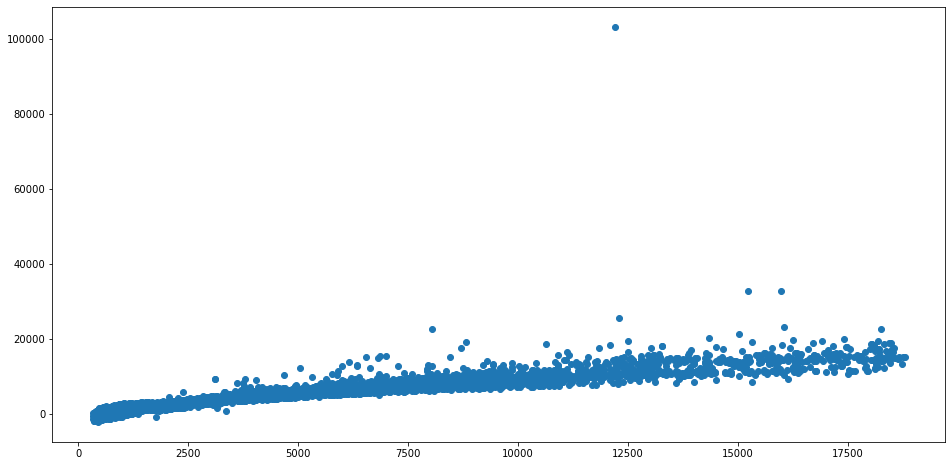

In [63]:
plt.figure(figsize=(16,8))
plt.scatter(test_labels['price'],y_pred)
plt.show()

In [64]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3715.84) * Intercept + (11209.08) * carat + (-124.1) * cut + (-333.94) * color + (-495.6) * clarity + (23.59) * depth + (-24.27) * table + (-1800.79) * length_x + (1871.79) * width_y + (-1761.31) * height_z + 

In [65]:
def remove_outlier (col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [66]:
for column in numcol:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

Description of carat
--------------------------------------------------------------------------------------
count    26270.000000
mean         0.793229
std          0.461918
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          2.025000
Name: carat, dtype: float64Description of carat
--------------------------------------------------------------------------------------


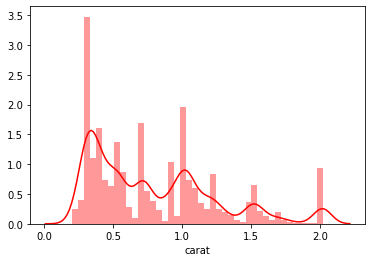

Boxplot of carat
--------------------------------------------------------------------------------------


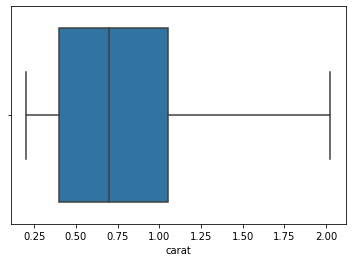

Description of depth
--------------------------------------------------------------------------------------
count    26270.000000
mean        61.744151
std          1.259991
min         58.750000
25%         61.000000
50%         61.800000
75%         62.500000
max         64.750000
Name: depth, dtype: float64Description of depth
--------------------------------------------------------------------------------------


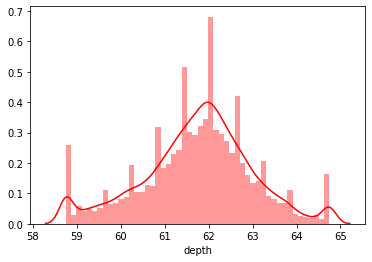

Boxplot of depth
--------------------------------------------------------------------------------------


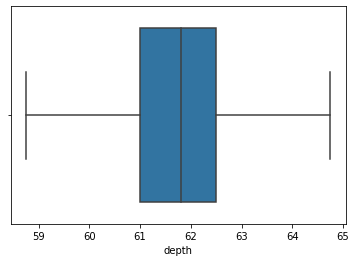

Description of table
--------------------------------------------------------------------------------------
count    26270.000000
mean        57.435603
std          2.156251
min         51.500000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64Description of table
--------------------------------------------------------------------------------------


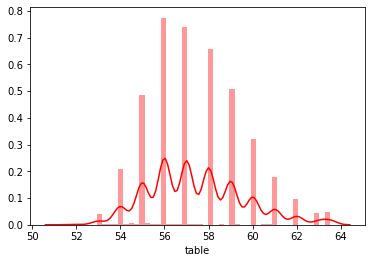

Boxplot of table
--------------------------------------------------------------------------------------


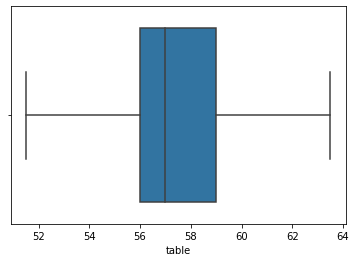

Description of length_x
--------------------------------------------------------------------------------------
count    26270.000000
mean         5.729645
std          1.125256
min          3.730000
25%          4.710000
50%          5.690000
75%          6.550000
max          9.310000
Name: length_x, dtype: float64Description of length_x
--------------------------------------------------------------------------------------


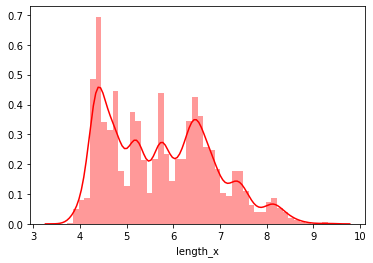

Boxplot of length_x
--------------------------------------------------------------------------------------


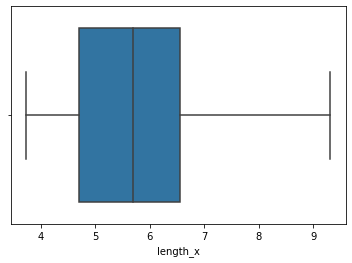

Description of width_y
--------------------------------------------------------------------------------------
count    26270.000000
mean         5.731569
std          1.117231
min          3.710000
25%          4.720000
50%          5.700000
75%          6.540000
max          9.270000
Name: width_y, dtype: float64Description of width_y
--------------------------------------------------------------------------------------


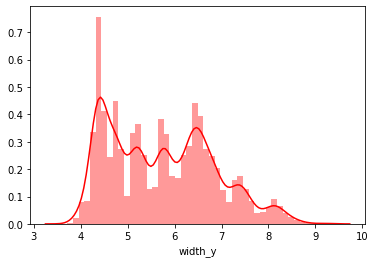

Boxplot of width_y
--------------------------------------------------------------------------------------


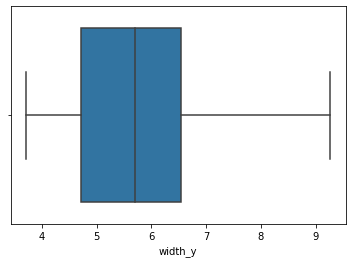

Description of height_z
--------------------------------------------------------------------------------------
count    26270.000000
mean         3.537614
std          0.695305
min          1.190000
25%          2.900000
50%          3.520000
75%          4.040000
max          5.750000
Name: height_z, dtype: float64Description of height_z
--------------------------------------------------------------------------------------


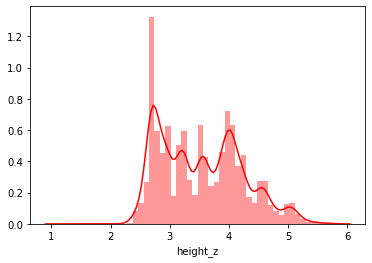

Boxplot of height_z
--------------------------------------------------------------------------------------


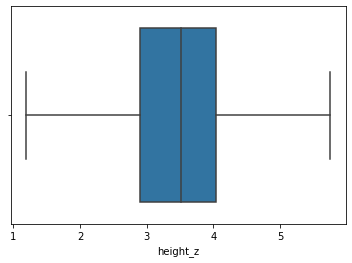

Description of price
--------------------------------------------------------------------------------------
count    26270.000000
mean      3736.799124
std       3468.803481
min        326.000000
25%        945.000000
50%       2375.000000
75%       5361.000000
max      11985.000000
Name: price, dtype: float64Description of price
--------------------------------------------------------------------------------------


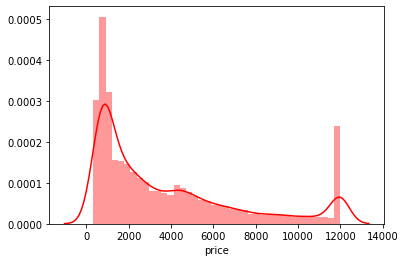

Boxplot of price
--------------------------------------------------------------------------------------


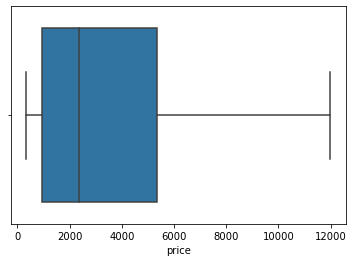

In [67]:
for x in numcol:
    univariateanalysis(x,20)

In [68]:
regression_model= LinearRegression()
regression_model.fit(x_train,train_labels)

LinearRegression()

In [69]:
for i, col_name in enumerate(x_train.columns):
    print ("Coefficient of {} is {}".format(col_name,regression_model.coef_[0][i] ))

Coefficient of carat is 11209.07829432937
Coefficient of cut is -124.10482887442933
Coefficient of color is -333.9383337979946
Coefficient of clarity is -495.60187872867266
Coefficient of depth is 23.587973211616934
Coefficient of table is -24.26604073894104
Coefficient of length_x is -1800.7917856067725
Coefficient of width_y is 1871.7860851173793
Coefficient of height_z is -1761.3068199705979


In [70]:
regression_model.intercept_[0]

3715.8381016862754

In [71]:
regression_model.score(x_train,train_labels)

0.9103929304688128

In [72]:
regression_model.score(x_test,test_labels)

0.8383667973134816

In [73]:
predicted_train=regression_model.fit(x_train, train_labels).predict(x_train)
a = np.sqrt(metrics.mean_squared_error(train_labels,predicted_train))

predicted_test=regression_model.fit(x_train, train_labels).predict(x_test)
b= np.sqrt(metrics.mean_squared_error(test_labels,predicted_test))

print ('RMSE for train data is : ',a)
print ('RMSE for test data is : ',b)


RMSE for train data is :  1209.1976431587336
RMSE for test data is :  1600.5278710494217


In [74]:
val= 'price ~ carat+cut+color+clarity+depth+table+length_x+width_y+height_z'

In [75]:
import statsmodels.formula.api as smf
lm1= smf.ols(formula=val, data= train_data).fit()
lm1.params

Intercept     3715.838102
carat        11209.078294
cut           -124.104829
color         -333.938334
clarity       -495.601879
depth           23.587973
table          -24.266041
length_x     -1800.791786
width_y       1871.786085
height_z     -1761.306820
dtype: float64

In [76]:
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.075e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        15:25:30   Log-Likelihood:            -1.5661e+05
No. Observations:               18389   AIC:                         3.132e+05
Df Residuals:                   18379   BIC:                         3.133e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3715.8381   1131.139      3.285      0.0

In [77]:
mse = np.mean ((lm1.predict(train_data.drop('price', axis=1))-train_data['price'])**2)
mse

1462158.9402206375

In [78]:
np.sqrt(mse)

1209.1976431587343

In [79]:
data=df.copy()

In [80]:
data.head()

,carat,cut,color,clarity,depth,table,length_x,width_y,height_z,price
0,0.30,0.0,1.0,5.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,1.0,3.0,0.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,1.0,2.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,0.0,2.0,3.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,0.0,2.0,1.0,60.4,59.0,4.35,4.43,2.65,779.0


In [81]:
data.drop('depth',axis=1,inplace=True)

In [82]:
data.head()

,carat,cut,color,clarity,table,length_x,width_y,height_z,price
0,0.30,0.0,1.0,5.0,58.0,4.27,4.29,2.66,499.0
1,0.33,1.0,3.0,0.0,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,1.0,2.0,60.0,6.04,6.12,3.78,6289.0
3,0.42,0.0,2.0,3.0,56.0,4.82,4.80,2.96,1082.0
4,0.31,0.0,2.0,1.0,59.0,4.35,4.43,2.65,779.0


In [83]:
x= data.drop('price', axis=1)
y= data[['price']]

In [84]:
x_train,x_test, train_labels, test_labels= train_test_split(x,y, test_size=0.30, random_state=1)

In [85]:
regression_model.fit(x_train,train_labels)

LinearRegression()

In [86]:
for i, col_name in enumerate(x_train.columns):
    print ("Coefficient of {} is {}".format(col_name,regression_model.coef_[0][i] ))

Coefficient of carat is 8807.392559119344
Coefficient of cut is -101.81700378786789
Coefficient of color is -276.9246931543456
Coefficient of clarity is -436.649853871971
Coefficient of table is -18.064706466801514
Coefficient of length_x is -1144.369716688339
Coefficient of width_y is 1211.5417010014146
Coefficient of height_z is -682.8994911005628


In [87]:
regression_model.intercept_[0]

2369.340487386173

In [88]:
regression_model.score(x_train,train_labels)

0.9315525753549283

In [89]:
regression_model.score(x_test,test_labels)

0.9296280065346998

In [90]:
predicted_train=regression_model.fit(x_train, train_labels).predict(x_train)
a = np.sqrt(metrics.mean_squared_error(train_labels,predicted_train))

predicted_test=regression_model.fit(x_train, train_labels).predict(x_test)
b= np.sqrt(metrics.mean_squared_error(test_labels,predicted_test))

print ('RMSE for train data is : ',a)
print ('RMSE for test data is : ',b)


RMSE for train data is :  908.6335357102955
RMSE for test data is :  917.4766983470971


In [91]:
val= 'price ~ carat+cut+color+clarity+table+length_x+width_y+height_z'

In [92]:
lm1= smf.ols(formula=val, data= train_data).fit()
lm1.params

Intercept     5281.561772
carat        11220.836508
cut           -121.306207
color         -333.666042
clarity       -495.132444
table          -25.939824
length_x     -1886.058323
width_y       1761.514044
height_z     -1452.489786
dtype: float64

In [93]:
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.334e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        15:25:30   Log-Likelihood:            -1.5661e+05
No. Observations:               18389   AIC:                         3.132e+05
Df Residuals:                   18380   BIC:                         3.133e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5281.5618    321.652     16.420      0.0

In [94]:
np.sqrt(lm1.mse_resid)

1209.5622453968926

In [95]:
y_pred =lm1.predict(test_data)

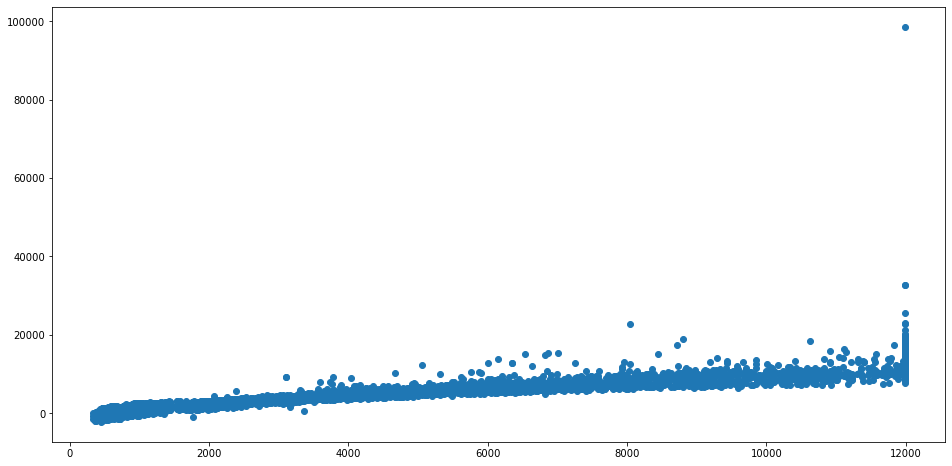

In [96]:
plt.figure(figsize=(16,8))
plt.scatter(test_labels['price'],y_pred)
plt.show()

In [97]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(5281.56) * Intercept + (11220.84) * carat + (-121.31) * cut + (-333.67) * color + (-495.13) * clarity + (-25.94) * table + (-1886.06) * length_x + (1761.51) * width_y + (-1452.49) * height_z + 

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
ss= StandardScaler()

In [101]:
x_train_scaled= ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [103]:
regression_model.fit(x_train_scaled,train_labels)

LinearRegression()

In [106]:
regression_model.score(x_train_scaled, train_labels)

0.9315525753549283

In [107]:
regression_model.score(x_test_scaled, test_labels)

0.9296280065346998

#### No significant impact of scaling to this dataset.

In [108]:
# The final regression Model equation

price = carat - cut-color-clarity-table-x + y- z